In [1]:
import matplotlib.pyplot as plt
import os.path
import numpy as np
%matplotlib inline

In [2]:
import Scripts_SigNonSig
reload(Scripts_SigNonSig)
from Scripts_SigNonSig import * 

In [3]:
out = get_data_for_sig_nonsig_analyses()
df_50_nonsig = out['df_50_nonsig']
df_50_sig = out['df_50_sig']



/home/bishop/cgagne/anaconda2/lib/python2.7/site-packages/pandas/core/frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)
Scripts_SigNonSig.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  region_data_single_row['Accuracy.50'] = np.mean(region_data['Accuracy.50'])
Scripts_SigNonSig.py:157: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  df_50_sig = df_50_sig.sort('PID') ## careful with the soring #
Scripts_SigNonSig.py:165: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  df_50_nonsig = df_50_nonsig.sort('PID') ## Careful with the sorting ##


# Load Bootstrap Data 

In [4]:
boot_results_sig = np.load('../data_meta_analysis/data_derived_meta_analysis/bootstrap_results_sig.npz')
boot_results_non = np.load('../data_meta_analysis/data_derived_meta_analysis/bootstrap_results_nonsig.npz')
boot_results_both_notrecentered = np.load('../data_meta_analysis/data_derived_meta_analysis/bootstrap_results_together.npz')

 
sig_thresh1=boot_results_both_notrecentered['sig_thresh1'].mean() # 95% of non re-centered

#sig_thresh2=boot_results_both['sig_thresh2'].mean() # max of means nonsig
mediann_sig = boot_results_sig['mediann'].mean()
mediann_non = boot_results_non['mediann'].mean()

#mediann_non_con = boot_results_n['mediann'].mean()

epcdf_store_non = boot_results_non['epcdf_store']
epcdf_store_sig = boot_results_sig['epcdf_store']
eppdf_store_non = boot_results_non['eppdf_store']
eppdf_store_sig = boot_results_sig['eppdf_store']


x = np.linspace(0,1,100) # what range for cdf # 


In [5]:
np.max(df_50_nonsig['Accuracy.50'])

0.68000000000000005

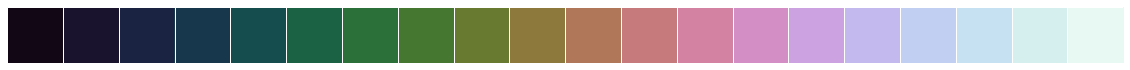

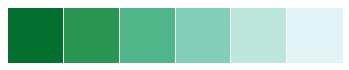

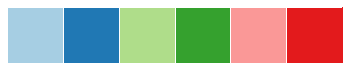

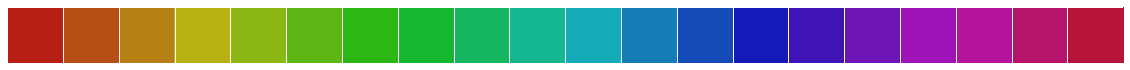

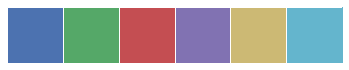

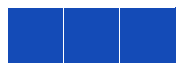

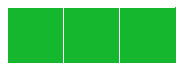

In [6]:
import seaborn as sns


pcube = sns.color_palette("cubehelix",20)
sns.palplot(pcube)

pbg = sns.color_palette("BuGn_r")
sns.palplot(pbg)

ppaired =sns.color_palette("Paired")
sns.palplot(ppaired)

phusl = sns.hls_palette(20,l=.4,s=.8)
sns.palplot(phusl)

pdefault =sns.color_palette()
sns.palplot(pdefault)

frontalsig = pdefault[0]
frontalnon = pdefault[1]

frontalsig = phusl[12]
frontalnon = phusl[7]

#frontalsig = ppaired[1]
#frontalnon = ppaired[3]

sns.palplot(frontalsig)
sns.palplot(frontalnon)



In [7]:
# Set the font dictionaries (for plot title and axis titles)
#title_font = {'fontname':'Arial', 'size':'20', 'color':'black', 'weight':'normal',
#              'verticalalignment':'bottom'} # Bottom vertical alignment for more space#

#axis_font = {'fontname':'Arial', 'size':'20'}

# ax1.set_xlabel('Study ID',**axis_font)
# ax1.set_ylabel('Decoding Accuracy',**axis_font)
# ax2.set_xlabel('Decoding Accuracy',**axis_font)
# ax2.set_ylabel('Cumulative Probability',**axis_font)
# ax3.set_xlabel('Decoding Accuracy',**axis_font)
# ax3.set_ylabel('Probability Density',**axis_font)
# ax1.set_title('(a)',**axis_font)
# ax2.set_title('(b)',**axis_font)
# ax3.set_title('(c)',**axis_font)

# Total Figu

/home/bishop/cgagne/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/home/bishop/cgagne/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'cambria'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


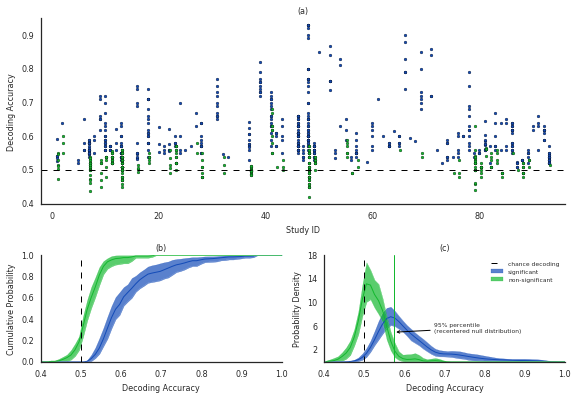

In [8]:
import matplotlib.gridspec as gridspec

alphaa = 0.7

sns.set_style('white')
fig = plt.figure()
params = {
   'axes.labelsize': 8,
   'axes.titlesize': 8,
    'axes.titleweight': 'normal',
    'axes.labelweight':'normal',
   'text.fontsize': 6,
   'legend.fontsize': 6,
   'xtick.labelsize': 8,
   'ytick.labelsize': 8,
   'text.usetex': False,
   'figure.figsize': [6, 4],
    'font.family':'cambria'
}
plt.rcParams.update(params)

alphadots=1
sizedots=8
mainlinewidth = 1
whiteoutline = 0.1
chanceline = 1

gs = gridspec.GridSpec(10, 2) # number of columns to be able to use
ax1 = plt.subplot(gs[0:6,:])
ax2 = plt.subplot(gs[6:10,0:1])
ax3 = plt.subplot(gs[6:10,1:2])


#
ax1.scatter(y=df_50_sig['Accuracy.50'].as_matrix(),x=df_50_sig['PID'].as_matrix(),
            s=sizedots,c=frontalsig,alpha=alphadots)
ax1.scatter(y=df_50_nonsig['Accuracy.50'].as_matrix(),x=df_50_nonsig['PID'].as_matrix()+.2,
            s=sizedots,c=frontalnon,alpha=alphadots)
ax1.axhline(y=0.5,color='k',linestyle='--',linewidth=chanceline)
#ax1.axhline(y=np.mean(sig_thresh2),color='g')
#ax1.axhline(y=np.mean(sig_thresh1),color='g')
#ax1.axhline(y=np.mean(mediann),color='b')


#### CDF 
# significant 
upci = np.percentile(epcdf_store_sig[40:100],97.5,axis=0)
loci = np.percentile(epcdf_store_sig[40:100],2.5,axis=0)
ax2.plot(x[40:100],np.mean(epcdf_store_sig,axis=0)[40:100],linewidth=mainlinewidth,color=frontalsig)
ax2.fill_between(x[40:100],upci[40:100],loci[40:100],color=frontalsig,alpha=alphaa)
ax2.plot(x[40:100],upci[40:100],color='white',linewidth=whiteoutline)
ax2.plot(x[40:100],loci[40:100],color='white',linewidth=whiteoutline)

# non significant 
upci = np.percentile(epcdf_store_non[40:100],97.5,axis=0)
loci = np.percentile(epcdf_store_non[40:100],2.5,axis=0)
ax2.plot(x[40:100],np.mean(epcdf_store_non,axis=0)[40:100],linewidth=mainlinewidth,color=frontalnon)
ax2.fill_between(x[40:100],upci[40:100],loci[40:100],color=frontalnon,alpha=alphaa)
ax2.plot(x[40:100],upci[40:100],color='white',linewidth=whiteoutline)
ax2.plot(x[40:100],loci[40:100],color='white',linewidth=whiteoutline)


##### PDF 

# significant 
upci = np.percentile(eppdf_store_sig[40:100],97.5,axis=0)
loci = np.percentile(eppdf_store_sig[40:100],2.5,axis=0)
ax3.plot(x[40:100],np.mean(eppdf_store_sig,axis=0)[40:100],linewidth=mainlinewidth,color=frontalsig)
ax3.fill_between(x[40:100],upci[40:100],loci[40:100],color=frontalsig,label='significant',alpha=alphaa)
ax3.plot(x[40:100],upci[40:100],color='white',linewidth=whiteoutline)
ax3.plot(x[40:100],loci[40:100],color='white',linewidth=whiteoutline)

# non significant 
upci = np.percentile(eppdf_store_non[40:100],97.5,axis=0)
loci = np.percentile(eppdf_store_non[40:100],2.5,axis=0)
ax3.plot(x[40:100],np.mean(eppdf_store_non,axis=0)[40:100],linewidth=mainlinewidth,color=frontalnon)
ax3.fill_between(x[40:100],upci[40:100],loci[40:100],color=frontalnon,label='non-significant',alpha=alphaa)
ax3.plot(x[40:100],upci[40:100],color='white',linewidth=whiteoutline)
ax3.plot(x[40:100],loci[40:100],color='white',linewidth=whiteoutline)

#ax3.axvline(x=np.mean(mediann),color='b')
ax3.axvline(x=np.mean(sig_thresh1),color=frontalnon,linewidth=chanceline)
#ax3.axvline(x=mediann_sig,color=frontalsig)
ax3.axvline(x=0.5,color='k',linestyle='--',label='chance decoding',linewidth=chanceline)
ax2.axvline(x=0.5,color='k',linestyle='--',linewidth=chanceline)
#ax3.axvline(x=np.mean(sig_thresh1),color='g')


plt.legend()


ax1.set_ylim(0.4,.95)
ax1.set_xlim(-2,96)
ax1.set_xlabel('Study ID')
ax1.set_ylabel('Decoding Accuracy')
ax2.set_xlabel('Decoding Accuracy')
ax2.set_ylabel('Cumulative Probability')
ax3.set_xlabel('Decoding Accuracy')
ax3.set_ylabel('Probability Density')
ax1.set_title('(a)')
ax2.set_title('(b)')
ax3.set_title('(c)')

# reduce y ticks
yticks = ax3.get_yticks()[:]
ax3.set_yticks(yticks[np.arange(1,len(yticks),2)])

for ax in [ax1,ax2,ax3]:
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False) 
    #for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        #label.set_fontname('Arial')
        #label.set_fontsize(16)
    ax.set_axis_bgcolor('white')


ax3.annotate('95% percentile \n(recentered null distribution)', 
             xy=(sig_thresh1,5), 
             xytext=(sig_thresh1+0.1,5),
             arrowprops=dict(arrowstyle='->',facecolor='black',linewidth=1),
            )
 
plt.tight_layout(h_pad=2.0,w_pad=1.0)
#plt.savefig('../Figures/Main/Figure2.png',dpi=300)
plt.show()

# Main Fig

/home/bishop/cgagne/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/bishop/cgagne/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'Helvetica'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


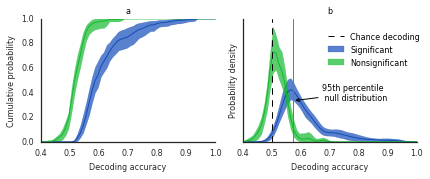

In [9]:
import matplotlib.gridspec as gridspec

alphaa = 0.7

sns.set_style('white')
params = {
   'axes.labelsize': 10,
   'axes.titlesize': 10,
    'axes.titleweight': 'normal',
    'axes.labelweight':'normal',
   'text.fontsize': 10,
   'legend.fontsize': 10,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'text.usetex': False,
}

params = {
   'axes.labelsize': 8,
   'axes.titlesize': 8,
    'axes.titleweight': 'normal',
    'axes.labelweight':'normal',
   'text.fontsize': 8,
   'legend.fontsize': 8,
   'xtick.labelsize': 8,
   'ytick.labelsize': 8,
   'text.usetex': False,
    'text.color':'black'
}

plt.rcParams.update(params)
plt.rcParams.update(params)
plt.rcParams['font.sans-serif']='Helvetica'
plt.rcParams['font.family']='sans-serif'

fig = plt.figure(figsize=(6,2.5))
alphadots=1
sizedots=8
mainlinewidth = 1
whiteoutline = 0.1
chanceline = 1

gs = gridspec.GridSpec(1, 2) # number of columns to be able to use
ax1 = plt.subplot(gs[:,0:1])
ax2 = plt.subplot(gs[:,1:2])



#### CDF 
# significant 
upci = np.percentile(epcdf_store_sig[40:100],97.5,axis=0)
loci = np.percentile(epcdf_store_sig[40:100],2.5,axis=0)
ax1.plot(x[40:100],np.mean(epcdf_store_sig,axis=0)[40:100],linewidth=mainlinewidth,color=frontalsig)
ax1.fill_between(x[40:100],upci[40:100],loci[40:100],color=frontalsig,alpha=alphaa)


# non significant 
upci = np.percentile(epcdf_store_non[40:100],97.5,axis=0)
loci = np.percentile(epcdf_store_non[40:100],2.5,axis=0)
ax1.plot(x[40:100],np.mean(epcdf_store_non,axis=0)[40:100],linewidth=mainlinewidth,color=frontalnon)
ax1.fill_between(x[40:100],upci[40:100],loci[40:100],color=frontalnon,alpha=alphaa)



##### PDF 

# significant 
upci = np.percentile(eppdf_store_sig[40:100],97.5,axis=0)
loci = np.percentile(eppdf_store_sig[40:100],2.5,axis=0)
ax2.plot(x[40:100],np.mean(eppdf_store_sig,axis=0)[40:100],linewidth=mainlinewidth,color=frontalsig)
ax2.fill_between(x[40:100],upci[40:100],loci[40:100],color=frontalsig,label='Significant',alpha=alphaa)


# non significant 
upci = np.percentile(eppdf_store_non[40:100],97.5,axis=0)
loci = np.percentile(eppdf_store_non[40:100],2.5,axis=0)
ax2.plot(x[40:100],np.mean(eppdf_store_non,axis=0)[40:100],linewidth=mainlinewidth,color=frontalnon)
ax2.fill_between(x[40:100],upci[40:100],loci[40:100],color=frontalnon,label='Nonsignificant',alpha=alphaa)

# mscl lines 
ax2.axvline(x=np.mean(sig_thresh1),color=frontalnon,linewidth=chanceline)
ax2.axvline(x=0.5,color='k',linestyle='--',label='Chance decoding',linewidth=chanceline)
ax2.axvline(x=0.5,color='k',linestyle='--',linewidth=chanceline)




ax1.set_xlabel('Decoding accuracy',fontname='Helvetica')
ax1.set_ylabel('Cumulative probability')
ax2.set_xlabel('Decoding accuracy')
ax2.set_ylabel('Probability density')

ax1.set_title('a')
ax2.set_title('b')

plt.legend(bbox_to_anchor=(.45, .95), loc=2)

ax2.set_yticks([])
ax2.set_yticklabels([])

for ax in [ax1,ax2,ax3]:
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False) 
    ax.set_axis_bgcolor('white')


ax2.annotate('95th percentile \n null distribution', 
             xy=(sig_thresh1,6), 
             xytext=(sig_thresh1+0.1,6),
             arrowprops=dict(arrowstyle='->',facecolor='black',linewidth=1),
            )
 
plt.tight_layout(h_pad=2.0,w_pad=1.0)
plt.savefig('../Figures/Figure2.png',dpi=400)
plt.savefig('../Figures/Figure2.eps',dpi=400)
plt.show()

# Scatter Alone

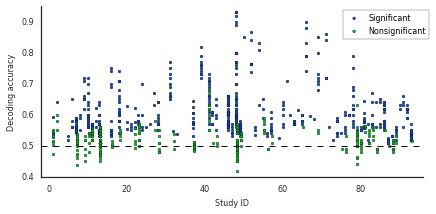

In [10]:
sns.set_style('white')
params = {
   'axes.labelsize': 8,
   'axes.titlesize': 8,
    'axes.titleweight': 'normal',
    'axes.labelweight':'normal',
   'text.fontsize': 8,
   'legend.fontsize': 8,
   'xtick.labelsize': 8,
   'ytick.labelsize': 8,
   'text.usetex': False,
    'text.color':'black'
}
plt.rcParams.update(params)
plt.rcParams.update(params)
plt.rcParams['font.sans-serif']='Helvetica'
plt.rcParams['font.family']='sans-serif'
fig = plt.figure(figsize=(6,3))


ax1 = plt.gca()

ax1.scatter(y=df_50_sig['Accuracy.50'].as_matrix(),x=df_50_sig['PID'].as_matrix(),
            s=sizedots,c=frontalsig,alpha=alphadots,label='Significant')
ax1.scatter(y=df_50_nonsig['Accuracy.50'].as_matrix(),x=df_50_nonsig['PID'].as_matrix()+.2,
            s=sizedots,c=frontalnon,alpha=alphadots,label='Nonsignificant')
ax1.axhline(y=0.5,color='k',linestyle='--',linewidth=chanceline)

sns.despine()
ax1.set_ylabel('Decoding accuracy')
ax1.set_xlabel('Study ID')
ax1.set_ylim(0.4,.95)
ax1.set_xlim(-2,96)
plt.legend(bbox_to_anchor=(.78, 1), loc=2,frameon=True)

plt.tight_layout(h_pad=2.0,w_pad=1.0)
plt.savefig('../Figures/Supp_scatter_non_sig.png',dpi=400)
plt.savefig('../Figures/Supp_scatter_non_sig.eps',dpi=400)
plt.show()

# Conservative 

In [11]:
boot_results_both_recentered = np.load('../data_meta_analysis/data_derived_meta_analysis/bootstrap_results_together_recenter.npz')


sig_thresh1=boot_results_both_recentered['sig_thresh1'].mean() # 95% of non re-centered


mediann_sig = boot_results_both_recentered['mediann']
mediann_non = boot_results_both_recentered['mediann_non']
epcdf_store_sig = boot_results_both_recentered['epcdf_store_si']
epcdf_store_non = boot_results_both_recentered['epcdf_store_non']
eppdf_store_sig = boot_results_both_recentered['eppdf_store_sig']
eppdf_store_non = boot_results_both_recentered['eppdf_store_non']



x = np.linspace(0,1,100) # what range for cdf # 


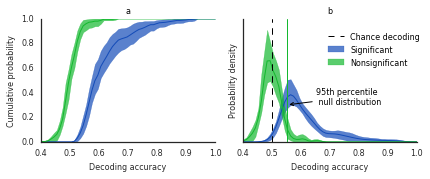

In [12]:
import matplotlib.gridspec as gridspec

alphaa = 0.7

sns.set_style('white')
params = {
   'axes.labelsize': 10,
   'axes.titlesize': 10,
    'axes.titleweight': 'normal',
    'axes.labelweight':'normal',
   'text.fontsize': 10,
   'legend.fontsize': 10,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'text.usetex': False,
}

params = {
   'axes.labelsize': 8,
   'axes.titlesize': 8,
    'axes.titleweight': 'normal',
    'axes.labelweight':'normal',
   'text.fontsize': 8,
   'legend.fontsize': 8,
   'xtick.labelsize': 8,
   'ytick.labelsize': 8,
   'text.usetex': False,
    'text.color':'black'
}

plt.rcParams.update(params)
plt.rcParams.update(params)
plt.rcParams['font.sans-serif']='Helvetica'
plt.rcParams['font.family']='sans-serif'

fig = plt.figure(figsize=(6,2.5))
alphadots=1
sizedots=8
mainlinewidth = 1
whiteoutline = 0.1
chanceline = 1

gs = gridspec.GridSpec(1, 2) # number of columns to be able to use
ax1 = plt.subplot(gs[:,0:1])
ax2 = plt.subplot(gs[:,1:2])



#### CDF 
# significant 
upci = np.percentile(epcdf_store_sig[40:100],97.5,axis=0)
loci = np.percentile(epcdf_store_sig[40:100],2.5,axis=0)
ax1.plot(x[40:100],np.mean(epcdf_store_sig,axis=0)[40:100],linewidth=mainlinewidth,color=frontalsig)
ax1.fill_between(x[40:100],upci[40:100],loci[40:100],color=frontalsig,alpha=alphaa)


# non significant 
upci = np.percentile(epcdf_store_non[40:100],97.5,axis=0)
loci = np.percentile(epcdf_store_non[40:100],2.5,axis=0)
ax1.plot(x[40:100],np.mean(epcdf_store_non,axis=0)[40:100],linewidth=mainlinewidth,color=frontalnon)
ax1.fill_between(x[40:100],upci[40:100],loci[40:100],color=frontalnon,alpha=alphaa)



##### PDF 

# significant 
upci = np.percentile(eppdf_store_sig[40:100],97.5,axis=0)
loci = np.percentile(eppdf_store_sig[40:100],2.5,axis=0)
ax2.plot(x[40:100],np.mean(eppdf_store_sig,axis=0)[40:100],linewidth=mainlinewidth,color=frontalsig)
ax2.fill_between(x[40:100],upci[40:100],loci[40:100],color=frontalsig,label='Significant',alpha=alphaa)


# non significant 
upci = np.percentile(eppdf_store_non[40:100],97.5,axis=0)
loci = np.percentile(eppdf_store_non[40:100],2.5,axis=0)
ax2.plot(x[40:100],np.mean(eppdf_store_non,axis=0)[40:100],linewidth=mainlinewidth,color=frontalnon)
ax2.fill_between(x[40:100],upci[40:100],loci[40:100],color=frontalnon,label='Nonsignificant',alpha=alphaa)

# mscl lines 
ax2.axvline(x=np.mean(sig_thresh1),color=frontalnon,linewidth=chanceline)
ax2.axvline(x=0.5,color='k',linestyle='--',label='Chance decoding',linewidth=chanceline)
ax2.axvline(x=0.5,color='k',linestyle='--',linewidth=chanceline)




ax1.set_xlabel('Decoding accuracy',fontname='Helvetica')
ax1.set_ylabel('Cumulative probability')
ax2.set_xlabel('Decoding accuracy')
ax2.set_ylabel('Probability density')

ax1.set_title('a')
ax2.set_title('b')

plt.legend(bbox_to_anchor=(.45, .95), loc=2)

ax2.set_yticks([])
ax2.set_yticklabels([])

for ax in [ax1,ax2,ax3]:
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False) 
    ax.set_axis_bgcolor('white')


ax2.annotate('95th percentile \n null distribution', 
             xy=(sig_thresh1,6), 
             xytext=(sig_thresh1+0.1,6),
             arrowprops=dict(arrowstyle='->',facecolor='black',linewidth=1),
            )
 
plt.tight_layout(h_pad=2.0,w_pad=1.0)
plt.savefig('../Figures/Figure2_cons.png',dpi=400)
#plt.savefig('../Figures/Figure2.eps',dpi=400)
plt.show()